# **Local Runtime Connection**

In [ ]:
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

# **Empty Folders**

In [2]:
import os
import shutil

def empty_folder(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")

folder_path = r'C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\frames'
empty_folder(folder_path)


# **Installations & CheckPoints & Pretrained Models**

In [ ]:
import torch
torch.cuda.get_device_name()

In [ ]:
! git clone https://github.com/ajay-sainy/Wav2Lip-GFPGAN.git

In [ ]:
basePath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN"
%cd {basePath}

wav2lipFolderName = 'Wav2Lip-master'
gfpganFolderName = 'GFPGAN-master'
wav2lipPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\Wav2Lip-master"
gfpganPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\GFPGAN-master"

In [ ]:
import urllib.request
import os

wav2lip_path = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\Wav2Lip-master"
url = 'https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth'
output_path = os.path.join(wav2lip_path, 'face_detection', 'detection', 'sfd', 's3fd.pth')

urllib.request.urlretrieve(url, output_path)

In [ ]:
! pip install --user gfpgan
! pip install opencv-contrib-python
! pip install dask[complete]
! pip install --upgrade Pillow
! pip install wget
! pip install gdown
! pip install -r "C:\Users\ranin.abbas\Wav2Lip-GFPGAN\Wav2Lip-master\requirements.txt"

In [ ]:
import urllib.request
import os

! cd $gfpganFolderName && python setup.py develop

gfpgan_folder_name = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\GFPGAN-master"

url = "https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth"
destination_folder = os.path.join(gfpgan_folder_name, 'experiments', 'pretrained_models')
destination_path = os.path.join(destination_folder, 'GFPGANv1.3.pth')

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Download the file
urllib.request.urlretrieve(url, destination_path)

print(f"Downloaded GFPGAN model to: {destination_path}")


In [ ]:
import os

file_path = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\Wav2Lip-master\checkpoints\wav2lip.pth"
if os.path.exists(file_path):
    print(f"Exist: True")
else:
    print(f"Exist: False")

In [ ]:
import os

CodeFormer_Path = r"C:\Users\ranin.abbas\CodeFormer"

# Check if the directory exists before attempting to remove it
if os.path.exists(CodeFormer_Path):
    # Remove the directory and its contents
    !rmdir /s /q "{CodeFormer_Path}"

# Clone the repository
!git clone https://github.com/sczhou/CodeFormer.git

# Change directory to the cloned repository
%cd CodeFormer


In [ ]:
# Install python dependencies
! pip install -r requirements.txt
# Install basicsr
! python basicsr/setup.py develop

In [ ]:
# Download the pre-trained model for facelib
!python scripts\\download_pretrained_models.py facelib

# Download the pre-trained model for CodeFormer
!python scripts\\download_pretrained_models.py CodeFormer


# **RealTime Code (720HD, 25FPS, Vertical, Face Restoration)**

### Lipsyncing Phase

In [ ]:
%%timeit -r 1 -n 1
import os

basePath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN"
wav2lipFolderName = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\Wav2Lip-master"
outputPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs"
inputAudioPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\inputs\tawab.mp3"
inputVideoPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\inputs\tawab.mp4"
lipSyncedOutputPath = r'C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\tawab.mp4'

if not os.path.exists(outputPath):
  os.makedirs(outputPath)

!cd $wav2lipFolderName && python inference.py \
--checkpoint_path checkpoints\wav2lip.pth \
--face {inputVideoPath} \
--audio {inputAudioPath} \
--outfile {lipSyncedOutputPath}

print("Resources released ...")

In [10]:
import os

basePath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN"
wav2lipFolderName = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\Wav2Lip-master"
outputPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs"
inputAudioPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\inputs\salma_audio.wav"
inputVideoPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\inputs\salma720.mp4"
lipSyncedOutputPath = r'C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\salma.mp4'

if not os.path.exists(outputPath):
  os.makedirs(outputPath)

!cd $wav2lipFolderName && python inference_yolo.py \
--checkpoint_path checkpoints\wav2lip.pth \
--face {inputVideoPath} \
--audio {inputAudioPath} \
--outfile {lipSyncedOutputPath}

print("Resources released ...")

Using cuda for inference.
(80, 1601)
Length of mel chunks: 497
Reading video frames from start...
Load checkpoint from: checkpoints\wav2lip.pth
Model loaded
Reading video frames from start...
Reading video frames from start...
Reading video frames from start...
avg: 0.033234151556218415
total for face detection: 16.51737332344055
Reading video frames from start...
Resources released ...



100%|██████████| 4/4 [00:20<00:00,  5.02s/it]


### Frames Extraction

In [7]:
from tqdm import tqdm
import cv2
import os

basePath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN"
wav2lipFolderName = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\Wav2Lip-master"
outputPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs"
inputAudioPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\inputs\tawab.mp3"
inputVideoPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\inputs\tawab.mp4"
lipSyncedOutputPath = r'C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\tawab.mp4'

# Frames Extraction
unProcessedFramesFolderName = 'frames'
unProcessedFramesFolderPath = os.path.join(outputPath, unProcessedFramesFolderName)

if not os.path.exists(unProcessedFramesFolderPath):
    os.makedirs(unProcessedFramesFolderPath)

# Process the video and extract frames
vidcap = cv2.VideoCapture(lipSyncedOutputPath)
total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

for frameNumber in tqdm(range(total_frames)):
    _, image = vidcap.read()
    cv2.imwrite(os.path.join(unProcessedFramesFolderPath, f"{frameNumber:04d}.jpg"), image)

print(f"\nResult Video Is Being Generated ...")

100%|████████| 497/497 [00:08<00:00, 59.74it/s]


Result Video Is Being Generated ...


In [8]:
import cv2
from tqdm import tqdm

inputAudioPath = r"../../Wav2Lip-GFPGAN/inputs/data.mp4"

vidcap = cv2.VideoCapture(inputAudioPath)
total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

for frameNumber in tqdm(range(total_frames)):
    _, image = vidcap.read()
    cv2.imwrite(os.path.join("../../Wav2Lip-GFPGAN/inputs/", f"{frameNumber:04d}.jpg"), image)

print(f"\nResult Video Is Being Generated ...")

  0%|          | 0/8294 [00:00<?, ?it/s]

  8%|▊         | 684/8294 [00:11<02:13, 57.13it/s]


KeyboardInterrupt: 

### GANs Model

In [17]:
from tqdm import tqdm
from os import path
import numpy as np
import cv2
import os

gfpganFolderName = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\GFPGAN-master"
unProcessedFramesFolderPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\frames"
outputPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs"
inference_gfpgan_script_path = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\GFPGAN-master\inference_gfpgan.py"

!cd $gfpganFolderName && \
  python inference_gfpgan.py -i $unProcessedFramesFolderPath -o $outputPath -v 1.3 -s 2 --only_center_face --aligned --bg_tile 0 --save_faces True

Processing 0.jpg ...
Processing 1.jpg ...
Processing 10.jpg ...
Processing 100.jpg ...
Processing 101.jpg ...
Processing 102.jpg ...
Processing 103.jpg ...
Processing 104.jpg ...
Processing 105.jpg ...
Processing 106.jpg ...
Processing 107.jpg ...
Processing 108.jpg ...
Processing 109.jpg ...
Processing 11.jpg ...
Processing 110.jpg ...
Processing 111.jpg ...
Processing 112.jpg ...
Processing 113.jpg ...
Processing 114.jpg ...
Processing 115.jpg ...
Processing 116.jpg ...
Processing 117.jpg ...
Processing 118.jpg ...
Processing 119.jpg ...
Processing 12.jpg ...
Processing 120.jpg ...
Processing 121.jpg ...
Processing 122.jpg ...
Processing 123.jpg ...
Processing 124.jpg ...
Processing 125.jpg ...
Processing 126.jpg ...
Processing 127.jpg ...
Processing 128.jpg ...
Processing 129.jpg ...
Processing 13.jpg ...
Processing 130.jpg ...
Processing 131.jpg ...
Processing 132.jpg ...
Processing 133.jpg ...
Processing 134.jpg ...
Processing 135.jpg ...
Processing 136.jpg ...
Processing 137.jpg 

c:\Users\ranin.abbas\AppData\Local\miniconda3\envs\misallam\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\ranin.abbas\AppData\Local\miniconda3\envs\misallam\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)

100%|██████████| 497/497 [01:36<00:00,  5.14it/s]


### CodeFormer

In [9]:
unProcessedFramesFolderPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\frames"
CodeFormer_Path = r"C:\Users\ranin.abbas\CodeFormer"
%cd CodeFormer

CODEFORMER_FIDELITY = 0.6
BACKGROUND_ENHANCE = True
FACE_UPSAMPLE = True

if BACKGROUND_ENHANCE:
    if FACE_UPSAMPLE:
        !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path "$unProcessedFramesFolderPath" --bg_upsampler realesrgan --face_upsample
    else:
        !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path "$unProcessedFramesFolderPath" --bg_upsampler realesrgan
else:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path "$unProcessedFramesFolderPath"


C:\Users\ranin.abbas\CodeFormer
Face detection model: retinaface_resnet50
Background upsampling: True, Face upsampling: True
[1/497] Processing: 0000.jpg
	detect 1 faces
[2/497] Processing: 0001.jpg
	detect 1 faces
[3/497] Processing: 0002.jpg
	detect 1 faces
[4/497] Processing: 0003.jpg
	detect 1 faces
[5/497] Processing: 0004.jpg
	detect 1 faces
[6/497] Processing: 0005.jpg
	detect 1 faces
[7/497] Processing: 0006.jpg
	detect 1 faces
[8/497] Processing: 0007.jpg
	detect 1 faces
[9/497] Processing: 0008.jpg
	detect 1 faces
[10/497] Processing: 0009.jpg
	detect 1 faces
[11/497] Processing: 0010.jpg
	detect 1 faces
[12/497] Processing: 0011.jpg
	detect 1 faces
[13/497] Processing: 0012.jpg
	detect 1 faces
[14/497] Processing: 0013.jpg
	detect 1 faces
[15/497] Processing: 0014.jpg
	detect 1 faces
[16/497] Processing: 0015.jpg
	detect 1 faces
[17/497] Processing: 0016.jpg
	detect 1 faces
[18/497] Processing: 0017.jpg
	detect 1 faces
[19/497] Processing: 0018.jpg
	detect 1 faces
[20/497] P

### ONNX GANS

In [ ]:
! git clone https://github.com/xuanandsix/GFPGAN-onnxruntime-demo.git

In [ ]:
! pip install --user onnxruntime onnx sympy coloredlogs

In [ ]:
import urllib.request
import os

url = 'https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth'
output_path = r"C:\Users\ranin.abbas\GFPGANv1.3.pth"

urllib.request.urlretrieve(url, output_path)

In [ ]:
! python C:\Users\ranin.abbas\FPGAN-onnxruntime-demo\torch2onnx.py --src_model_path C:\Users\ranin.abbas\GFPGANv1.3.pth --dst_model_path C:\Users\ranin.abbas\GFPGANv1.3.onnx --img_size 512

In [1]:
import torch
import face_detection
import cv2
import matplotlib.pyplot as plt

import numpy as np
import argparse
import os
from os import listdir, path
from tqdm import tqdm


inputAudioPath = r"../../Wav2Lip-GFPGAN/inputs/data.mp4"
# fps = 25
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} for inference.'.format(device))

detector = face_detection.FaceAlignment(face_detection.LandmarksType._2D, 
											flip_input=False, device=device)

def face_detect(images):

	batch_size = 1
	
	while 1:
		predictions = []
		try:
			for i in range(0, len(images), batch_size):
				predictions.extend(detector.get_detections_for_batch(np.array(images[i:i + batch_size])))
		except RuntimeError:
			if batch_size == 1: 
				raise RuntimeError('Image too big to run face detection on GPU. Please use the --resize_factor argument')
			batch_size //= 2
			print('Recovering from OOM error; New batch size: {}'.format(batch_size))
			continue
		break

	results = []
	pady1, pady2, padx1, padx2 = [0, 10, 0, 0]
	for rect, image in zip(predictions, images):
		if rect is None:
			cv2.imwrite('temp/faulty_frame.jpg', image) # check this frame where the face was not detected.
			raise ValueError('Face not detected! Ensure the video contains a face in all the frames.')

		y1 = max(0, rect[1] - pady1)
		y2 = min(image.shape[0], rect[3] + pady2)
		x1 = max(0, rect[0] - padx1)
		x2 = min(image.shape[1], rect[2] + padx2)
		
		results.append([x1, y1, x2, y2])

	boxes = np.array(results)
	results = [[image[y1: y2, x1:x2], (y1, y2, x1, x2)] for image, (x1, y1, x2, y2) in zip(images, boxes)]

	return results

def main():
    detector = face_detection.FaceAlignment(face_detection.LandmarksType._2D, 
											flip_input=False, 
											device=device)
    
    vidcap = cv2.VideoCapture(inputAudioPath)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('Reading video frames from start...')

    out = cv2.VideoWriter("out/anno.avi", cv2.VideoWriter_fourcc(*'DIVX'), 25, (96, 96))
    for frameNumber in tqdm(range(total_frames)):
        _, frame = vidcap.read()
        
        face, coords = face_detect([frame])[0]
        face = cv2.resize(face, (96, 96))
        out.write(face.astype(np.uint8))
    
    out.release()
	
main()

Using cuda for inference.
Reading video frames from start...


100%|██████████| 8294/8294 [17:06<00:00,  8.08it/s]


In [ ]:
import os
import time

# Define paths
model_path = r"C:\Users\ranin.abbas\GFPGANv1.3.onnx"
input_folder = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\frames"
output_folder = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\frames_onnx"

# List all files in the input folder
input_files = os.listdir(input_folder)

# Ensure the output folder exists; create it if it doesn't
os.makedirs(output_folder, exist_ok=True)

# Initialize variables for timing
total_time = 0
num_frames = 0

# Loop through input files
for input_file in input_files:
    # Create the full paths for input and output files
    input_path = os.path.join(input_folder, input_file)
    output_file = os.path.splitext(input_file)[0] + "_out.jpg"
    output_path = os.path.join(output_folder, output_file)

    # Measure the start time
    start_time = time.time()

    # Run the script for each input file
    command = f"python C:\\Users\\ranin.abbas\\FPGAN-onnxruntime-demo\\demo_onnx.py --model_path {model_path} --image_path {input_path} --save_path {output_path}"
    os.system(command)

    # Measure the end time
    end_time = time.time()

    # Calculate the time taken for this frame
    frame_time = end_time - start_time

    # Add the frame time to the total time
    total_time += frame_time

    # Increment the frame count
    num_frames += 1

    print(f"Processed {input_file} in {frame_time:.2f} seconds and saved the result as {output_file}")

# Calculate and print the average time per frame
if num_frames > 0:
    average_time_per_frame = total_time / num_frames
    print(f"Average time per frame: {average_time_per_frame:.2f} seconds")
else:
    print("No frames processed.")


Processed 0000.jpg in 0.55 seconds and saved the result as 0000_out.jpg
Processed 0001.jpg in 0.39 seconds and saved the result as 0001_out.jpg
Processed 0002.jpg in 0.46 seconds and saved the result as 0002_out.jpg
Processed 0003.jpg in 0.38 seconds and saved the result as 0003_out.jpg
Processed 0004.jpg in 0.47 seconds and saved the result as 0004_out.jpg
Processed 0005.jpg in 0.55 seconds and saved the result as 0005_out.jpg
Processed 0006.jpg in 0.40 seconds and saved the result as 0006_out.jpg
Processed 0007.jpg in 0.40 seconds and saved the result as 0007_out.jpg
Processed 0008.jpg in 0.50 seconds and saved the result as 0008_out.jpg
Processed 0009.jpg in 0.47 seconds and saved the result as 0009_out.jpg
Processed 0010.jpg in 0.45 seconds and saved the result as 0010_out.jpg
Processed 0011.jpg in 0.45 seconds and saved the result as 0011_out.jpg
Processed 0012.jpg in 0.46 seconds and saved the result as 0012_out.jpg
Processed 0013.jpg in 0.42 seconds and saved the result as 0013_

In [ ]:
! python C:\Users\ranin.abbas\GFPGAN-onnxruntime-demo\demo_onnx.py --model_path C:\Users\ranin.abbas\GFPGANv1.3.onnx --image_path C:\Users\ranin.abbas\GFPGAN-onnxruntime-demo\cropped_faces\Justin_Timberlake_crop.png --save_path C:\Users\ranin.abbas\GFPGAN-onnxruntime-demo\imgs\out.jpg

### Collecting Frames

In [10]:
from tqdm import tqdm
import numpy as np
import cv2
import os

# restoredFramesPath = r'C:\Users\ranin.abbas\CodeFormer\results\frames_0.6\final_results'
restoredFramesPath =  r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\restored_imgs"
basePath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN"
processedVideoOutputPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\collection"

dir_list = os.listdir(restoredFramesPath)
dir_list.sort()

batch = 0
batchSize = 6000

# Create a single progress bar for all chunks
total_batches = len(range(0, len(dir_list), batchSize))
progress_bar = tqdm(total=total_batches, desc="Processing Batches", unit="batch", position=0)

for i in range(0, len(dir_list), batchSize):
    img_array = []
    start, end = i, i + batchSize
    print("Processing batch", start, "-", end)
    for filename in dir_list[start:end]:
        filename = os.path.join(restoredFramesPath, filename)
        img = cv2.imread(filename)
        if img is None:
            continue
        height, width, layers = img.shape
        size = (width, height)
        img_array.append(img)

    out = cv2.VideoWriter(os.path.join(processedVideoOutputPath, f'batch_{batch:04d}.mp4'),
                          cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
    batch += 1

    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

concatTextFilePath = os.path.join(processedVideoOutputPath, 'concat.txt')
concatTextFile = open(concatTextFilePath, "w")
for ips in range(batch):
    concatTextFile.write(f"file batch_{ips:04d}.avi\n")
concatTextFile.close()

# Print the content of concat.txt
with open(concatTextFilePath, 'r') as file:
    print(file.read())

concatedVideoOutputPath = os.path.join(processedVideoOutputPath, 'concated_output.avi')
!ffmpeg -y -f concat -i {concatTextFilePath} -c copy {concatedVideoOutputPath}

finalProcessedOutputVideo = os.path.join(processedVideoOutputPath, 'final_with_audio.mp4')
!ffmpeg -y -i {concatedVideoOutputPath} -i {inputAudioPath} -map 0 -map 1:a -c:v copy -shortest {finalProcessedOutputVideo}


Processing Batches:   0%| | 0/1 [00:00<?, ?batc

Processing batch 0 - 6000


Processing Batches: 100%|█| 1/1 [00:26<00:00, 2

file batch_0000.avi




ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with clang version 17.0.1
  configuration: --prefix=/d/bld/ffmpeg_1696213838503/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/d/bld/ffmpeg_1696213838503/_build_env/Library/bin/pkg-config
  libavutil      57. 28.100 / 57. 28.100
  libavcodec     59. 37.100 / 59. 37.100
  libavformat    59. 27.100 / 59

### annotate

In [11]:
import torch
import face_detection
import cv2
import matplotlib.pyplot as plt

import numpy as np
import argparse
import os
from os import listdir, path
from tqdm import tqdm


inputAudioPath = r"../../Wav2Lip-GFPGAN/inputs/data.mp4"
# fps = 25
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} for inference.'.format(device))

detector = face_detection.FaceAlignment(face_detection.LandmarksType._2D, 
											flip_input=False, device=device)

def face_detect(images):

	batch_size = 1
	
	while 1:
		predictions = []
		try:
			for i in range(0, len(images), batch_size):
				predictions.extend(detector.get_detections_for_batch(np.array(images[i:i + batch_size])))
		except RuntimeError:
			if batch_size == 1: 
				raise RuntimeError('Image too big to run face detection on GPU. Please use the --resize_factor argument')
			batch_size //= 2
			print('Recovering from OOM error; New batch size: {}'.format(batch_size))
			continue
		break

	results = []
	pady1, pady2, padx1, padx2 = [0, 10, 0, 0]
	for rect, image in zip(predictions, images):
		if rect is None:
			cv2.imwrite('temp/faulty_frame.jpg', image) # check this frame where the face was not detected.
			raise ValueError('Face not detected! Ensure the video contains a face in all the frames.')

		y1 = max(0, rect[1] - pady1)
		y2 = min(image.shape[0], rect[3] + pady2)
		x1 = max(0, rect[0] - padx1)
		x2 = min(image.shape[1], rect[2] + padx2)
		
		results.append([x1, y1, x2, y2])

	boxes = np.array(results)
	results = [[image[y1: y2, x1:x2], (y1, y2, x1, x2)] for image, (x1, y1, x2, y2) in zip(images, boxes)]

	return results

def main():
    detector = face_detection.FaceAlignment(face_detection.LandmarksType._2D, 
											flip_input=False, 
											device=device)
    
    vidcap = cv2.VideoCapture(inputAudioPath)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('Reading video frames from start...')

    out = cv2.VideoWriter("out/anno.avi", cv2.VideoWriter_fourcc(*'DIVX'), 25, (96, 96))
    for frameNumber in tqdm(range(total_frames)):
        _, frame = vidcap.read()
        
        face, coords = face_detect([frame])[0]
        face = cv2.resize(face, (96, 96))
        out.write(face.astype(np.uint8))
    
    out.release()
	
main()

Using cuda for inference.


  0%|          | 0/8294 [00:00<?, ?it/s]

Reading video frames from start...


100%|██████████| 8294/8294 [16:58<00:00,  8.15it/s]


In [32]:
import torch
import face_detection
import cv2
import matplotlib.pyplot as plt

import numpy as np
import argparse
import os
from os import listdir, path
from tqdm import tqdm


inputAudioPath = r"../../Wav2Lip-GFPGAN/inputs/data.mp4"
# fps = 25
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} for inference.'.format(device))

detector = face_detection.FaceAlignment(face_detection.LandmarksType._2D, 
											flip_input=False, device=device)

def face_detect(images):

	batch_size = 1
	
	while 1:
		predictions = []
		try:
			for i in range(0, len(images), batch_size):
				predictions.extend(detector.get_detections_for_batch(np.array(images[i:i + batch_size])))
		except RuntimeError:
			if batch_size == 1: 
				raise RuntimeError('Image too big to run face detection on GPU. Please use the --resize_factor argument')
			batch_size //= 2
			print('Recovering from OOM error; New batch size: {}'.format(batch_size))
			continue
		break

	results = []
	pady1, pady2, padx1, padx2 = [0, 0, 0, 0]
	for rect, image in zip(predictions, images):
		if rect is None:
			cv2.imwrite('temp/faulty_frame.jpg', image) # check this frame where the face was not detected.
			raise ValueError('Face not detected! Ensure the video contains a face in all the frames.')

		y1 = max(0, rect[1] - pady1)
		y2 = min(image.shape[0], rect[3] + pady2)
		x1 = max(0, rect[0] - padx1)
		x2 = min(image.shape[1], rect[2] + padx2)
		
		results.append([x1, y1, x2, y2])

	boxes = np.array(results)
	results = [[image[y1: y2, x1:x2], (x1, y1, x2, y2)] for image, (x1, y1, x2, y2) in zip(images, boxes)]

	return results

def cvt_to_yolo_format(coords, image_width, image_height):
    x1, y1, x2, y2 = coords

    x_center = (x1 + x2) / (2 * image_width)
    y_center = (y1 + y2) / (2 * image_height)
    width = (x2 - x1) / image_width
    height = (y2 - y1) / image_height

    return x_center, y_center, width, height



def main():
    detector = face_detection.FaceAlignment(face_detection.LandmarksType._2D, 
											flip_input=False, 
											device=device)
    
    vidcap = cv2.VideoCapture(inputAudioPath)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('Reading video frames from start...')

    i = 0
	
    for frameNumber in tqdm(range(total_frames)):
        _, frame = vidcap.read()
        
        _, coords = face_detect([frame])[0]
		
        width = frame.shape[1]
        height = frame.shape[0]

        x_center, y_center, width, height = cvt_to_yolo_format(coords, width, height)

        cv2.imwrite(f"yolo/data/face{i}.jpg", frame)
        with open(f"yolo/data/face{i}.txt", 'w') as f:
            f.write(f"{0} {x_center} {y_center} {width} {height}")

        i += 1
		
main()

Using cuda for inference.


  0%|          | 0/8294 [00:00<?, ?it/s]

Reading video frames from start...


100%|██████████| 8294/8294 [19:03<00:00,  7.26it/s]


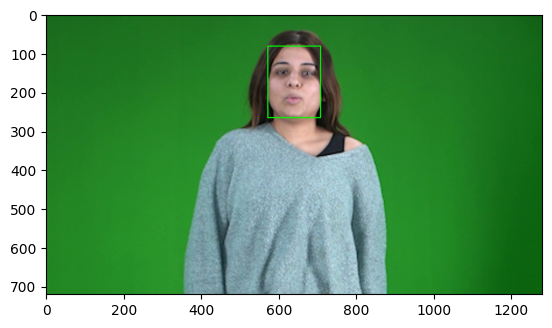

In [40]:
import cv2 as cv
import matplotlib.pyplot as plt

def convert_normalized_to_xywh(x_center, y_center, width, height, img_width, img_height):
    x1 = int((x_center - width / 2) * img_width)
    y1 = int((y_center - height / 2) * img_height)
    x2 = int((x_center + width / 2) * img_width)
    y2 = int((y_center + height / 2) * img_height)

    return x1, y1, x2, y2

def draw_image_with_kp_and_bbox(path, txt):
    with open(txt) as f:
        # Read the lines and split the values
        lines = f.readlines()
        data = [float(value) for value in lines[0].split()]

    img = cv.imread(str(path))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    img_width = img.shape[1]
    img_height = img.shape[0]

    x1, y1, x2, y2 = convert_normalized_to_xywh(data[1], data[2], data[3], data[4], img_width, img_height)

    # Draw rectangle
    cv.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(img)
    plt.show()

image_path = 'yolo/data/face8000.jpg'
txt_path = 'yolo/data/face8000.txt'
draw_image_with_kp_and_bbox(image_path, txt_path)


### PipeLine 

In [24]:
import os
import subprocess
import time

class Pipline():
    """ From Wave2lip 2 GANs
    """
    def __init__(self):
        
        self.basePath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN"
        self.wav2lipFolderName = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\Wav2Lip-master"
        self.wave2lipCheckpointPath = "checkpoints/wav2lip.pth"
        self.inputAudioPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\inputs\salma_audio.wav"
        self.inputVideoPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\inputs\Nourhan.mp4"
        self.lipSyncedOutputPath = r'C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\salma.mp4'
        self.gfpganFolderName = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\GFPGAN-master"
        self.unProcessedFramesFolderPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\frames"
        self.outputPath = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs"
        self.inference_gfpgan_script_path = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\GFPGAN-master\inference_gfpgan.py"
        self.restoredFaces = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\restored_imgs"
        self.finalFaces = r"C:\Users\ranin.abbas\Wav2Lip-GFPGAN\outputs\final_faces"

        # s = time.time()
        # self._wave2lip()
        # e = time.time()
        # print(f"wave2lip time: {e-s}")
        
        print("Starting GFPGAN ....................")

        s = time.time()
        self._gfpgan()
        e = time.time()
        print(f"GFPGAN time: {e-s}")
        
        # print("Starting REALESRGAN ....................")

        # s = time.time()
        # self._realesrgan()
        # e = time.time()
        # print(f"realesrgan time: {e-s}")

    def _wave2lip(self):
        """ Run wave2lip layer
        """
        if not os.path.exists(self.outputPath):
            os.makedirs(self.outputPath)

        command = [
            "python", "inference_yolo.py",
            "--checkpoint_path", self.wave2lipCheckpointPath,
            "--face", self.inputVideoPath,
            "--audio", self.inputAudioPath,
            "--outfile", self.unProcessedFramesFolderPath
        ]
        try:
            with subprocess.Popen(command, cwd=self.wav2lipFolderName, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, bufsize=1, universal_newlines=True) as process:
                for line in process.stdout:
                    print(line, end='')

            print("Wav2Lip execution completed successfully.")
        except subprocess.CalledProcessError as e:
            print(f"An error occurred: {e}")
    
    def _gfpgan(self):
        """ Run GFPGAN Layer
        """
        
        command = [
            "python", "inference_gfpgan.py",
            "-i", self.unProcessedFramesFolderPath,
            "-o", self.outputPath,
            "-v", "1.3",
            "-s", "1",
            "--only_center_face",
            "--bg_tile", "0",
            "--bg_upsampler", "None"
        ]

        try:
            with subprocess.Popen(command, cwd=self.gfpganFolderName, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, bufsize=1, universal_newlines=True) as process:
                for line in process.stdout:
                    print(line, end='')
            print("GANs execution completed successfully.")
        except subprocess.CalledProcessError as e:
            print(f"An error occurred: {e}")

    def _realesrgan(self):
        command = [
            "C:/Users/ranin.abbas/Wav2Lip-GFPGAN/GFPGAN-master/realesrgan/realesrgan-ncnn-vulkan.exe",
            "-i", self.restoredFaces,
            "-o", self.finalFaces
        ]

        try:
            subprocess.run(command, check=True)
            print("Real-ESRGAN execution completed successfully.")
        except subprocess.CalledProcessError as e:
            print(f"An error occurred: {e}")

In [25]:
Pipline()

Starting GFPGAN ....................
c:\Users\ranin.abbas\AppData\Local\miniconda3\envs\misallam\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\ranin.abbas\AppData\Local\miniconda3\envs\misallam\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)

  0%|          | 0/2 [00:00<?, ?it/s]Processing 0.jpg ...
landmark: 5.27164626121521
align: 0.0073778629302978516
upsample time: 0.26093530654907227

 50%|█████     | 1/2 [00:05<00:05,  5.82s/it]Processing 01.jpg ...
landmark: 0.0711526870727539
align: 0.0
upsample time: 0.2699313163757324

10